###Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data Manipulation
import pandas as pd
import numpy as np

In [ ]:
#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#NLP for text-processing
import nltk
import scipy
import re
from scipy import spatial 
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()

In [ ]:
# other libraries
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [ ]:
#import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
#Remove Warnings
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Recommender_system/flipkart_ecommerce.csv")
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
data.shape

(20000, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

Adding a new length column to give the total length of the 'description' input variable

In [ ]:
data['length'] = data['description'].str.len()

Adding a new column for the number of words in the descriptio before text preprocessing

In [ ]:
data['description'] = data['description'].fillna("")
data['no_of_words'] = data.description.apply(lambda x : len(x.split()))

###Word count distribution for 'description'

Text(0.5, 1.0, 'Words Distribution per bin')

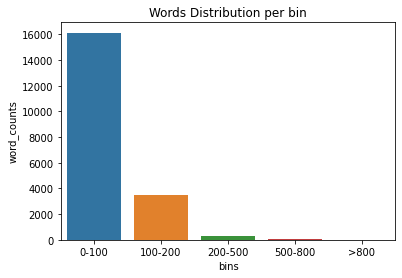

In [ ]:
bins=[0,50,75,np.inf]
data['bins']=pd.cut(data.no_of_words, bins=[0,100,300,500,800, np.inf], labels=['0-100','100-200','200-500','500-800','>800'])
words_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'word_counts'})
sns.barplot(x='bins',y='word_counts',data=words_distribution).set_title("Words Distribution per bin")

Hence. most descriptions have less than 100 words and approx 20% have 100 to 200 words

###Data Preprocessing

In [ ]:
# Number of missing values in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'missing'})

#Create a percentage of missing values
missing['percent'] = missing['missing'] / len(data)

#sorting the values in descending order to see highest count on the top
missing.sort_values('percent',ascending = False)

,missing,percent
brand,5864,0.29320
retail_price,78,0.00390
discounted_price,78,0.00390
product_specifications,14,0.00070
image,3,0.00015
bins,2,0.00010
length,2,0.00010
product_rating,0,0.00000
no_of_words,0,0.00000
overall_rating,0,0.00000


### Text Preprocessing
Text preprocessing tasks include

• Converting the text data to lowercase

• Removing/replacing the punctuations

• Removing/replacing the numbers

• Removing extra whitespaces

• Removing stop words

• Stemming and lemmatization

In [ ]:
#Remove punctuation
data['description'] = data['description'].str.replace(r'[^\w\d\s]',' ')

#Replace whitespace between terms with a single space
data['description'] = data['description'].str.replace(r'\s+',' ')

#Remove leading and trailing whitespace
data['description'] = data['description'].str.replace(r'^\s+|\s+?$', '')

# converting to lower case
data['description'] = data['description'].str.lower()

data['description'].head()

0    key features of alisha solid women s cycling s...
1    fabhomedecor fabric double sofa bed finish col...
2    key features of aw bellies sandals wedges heel...
3    key features of alisha solid women s cycling s...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object

In [ ]:
# Removing stop words
nltk.download('stopwords')
stop = stopwords.words('english')
pattern = r'\b(/:{})\b'.format('|'.join(stop))
data['description'] = data['description'].str.replace(pattern, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Removing single characters
data['description'] = data['description'].str.replace(r'\s+',' ')
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if len(x)>1))

In [ ]:
data['description'].head()

0    key features alisha solid women cycling shorts...
1    fabhomedecor fabric double sofa bed finish col...
2    key features aw bellies sandals wedges heel ca...
3    key features alisha solid women cycling shorts...
4    specifications sicons purpose arnica dog shamp...
Name: description, dtype: object

In [ ]:
# Removing domain related stop words from description
specific_stop_words = ["rs","flipkart","buy","com","free","day","cash","replacement","guarantee","genuine","key","feature","delivery","products","product","shipping", "online","india","shop"]
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in specific_stop_words))
data['description'].head()

0    features alisha solid women cycling shorts cot...
1    fabhomedecor fabric double sofa bed finish col...
2    features aw bellies sandals wedges heel casual...
3    features alisha solid women cycling shorts cot...
4    specifications sicons purpose arnica dog shamp...
Name: description, dtype: object

Let's see what are the most occured words in the corpus and understand the data better

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


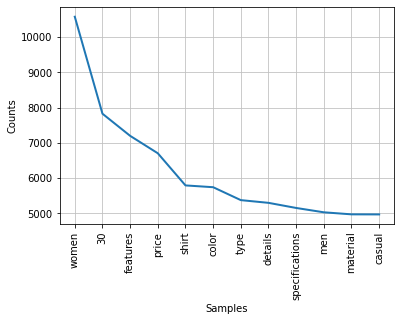

[('women', 10574), ('30', 7826), ('features', 7199), ('price', 6705), ('shirt', 5794), ('color', 5743), ('type', 5377), ('details', 5300), ('specifications', 5155), ('men', 5032), ('material', 4974), ('casual', 4972)]


In [ ]:
#Most frequent words after removing domain related stop words
nltk.download('punkt')
a = data['description'].str.cat(sep=" ")
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
word_dist.plot(12,cumulative=False)
print(word_dist.most_common(12))

Hence the graph reveals that words like *women*, *price*, *shirt* etc appeared more commonly in the data.

###Model Building 
We want to build two models :
1. A content-based recommendation system
2. A product search engine

From implementation point of view, both the models are same. But the problem each solves is different.

###Content-based Recommendation System
for content based systems, let's use the TF-IDF approach

In [ ]:
# text cleaning
data['description'] = data['description'].fillna('')

#define the vectorizer
T_vec = TfidfVectorizer(stop_words='english')

# getthe vectors
T_vec_matrix = T_vec.fit_transform(data['description'])

#shape
T_vec_matrix.shape

(20000, 26162)

A cosine similarity is used in this project. We need to write a function that takes
product descriptions as input and lists N most similar items/products.
We also need to do reverse mapping of product names to their indices.

In [ ]:
# Reversing the map of indices and product
product_index = pd.Series(data.index, index=data['product_name']).drop_duplicates()
product_index

product_name
Alisha Solid Women's Cycling Shorts            0
FabHomeDecor Fabric Double Sofa Bed            1
AW Bellies                                     2
Alisha Solid Women's Cycling Shorts            3
Sicons All Purpose Arnica Dog Shampoo          4
                                           ...  
WallDesign Small Vinyl Sticker             19995
Wallmantra Large Vinyl Stickers Sticker    19996
Elite Collection Medium Acrylic Sticker    19997
Elite Collection Medium Acrylic Sticker    19998
Elite Collection Medium Acrylic Sticker    19999
Length: 20000, dtype: int64

In the following steps, everything is wrapped under a single function to make testing
easier.
1. Obtain the index given the product.
2. Obtain cosine similarity scores.
3. Sort the scores.
4. Get the top N results from the list.
5. Output the product names.

In [ ]:
#Function that talkes in product title as input and outputs the most similar product

def predict_products(text):

  #getting index
  index  = product_index[text]

  #Obtaining the pairwise similarity scores
  score_matrix = linear_kernel(T_vec_matrix[index], T_vec_matrix)
  matching_sc = list(enumerate(score_matrix[0]))

  #Sort the product based on the similarity scores
  matching_sc = sorted(matching_sc, key=lambda x: x[1], reverse=True)

  #Getting the scores of the 10 most similar product
  matching_sc = matching_sc[1:10]

  #Getting the product indices
  product_indices = [i[0] for i in matching_sc]

  #Show the similar products
  return data['product_name'].iloc[product_indices]

recommended_product = predict_products(input("Enter a product name : "))
if recommended_product is not None:
  print("\nSimilar products")
  print("\n")
  for product_name in recommended_product:
    print(product_name)

Enter a product name : Chazer Running Shoes

Similar products


Chazer
Nike 684658-003 Training & Gym Shoes, Running Shoes
Nivia School Lace Up Shoes
Glacier Running Shoes
Knight Ace Kraasa Sports Running Shoes, Cycling Shoes, Walking Shoes
TOUCHWOOD Noble Light Black Sports Running Shoes
BAAJ Running Shoes
Apoxy APX-RUNNER-2-KIDS-BLUE-ORANGE Running Shoes
Skovin Boy School Shoes Lace Up


If a customer clicks Chazer Running Shoes, they get
recommendations based on any other brand running shoes or Chazer’s any other
products.

• Chazer Shoes is there because of the Chazer brand.

• The rest of the recommendations are running shoes by a different brand.

**This is one version of the recommendation system using NLP.** 

To get better results,
we can do the following things.

• A better approach to the content-based recommender system can be applied by creating the user profile (currently not in the scope of the
data set).

• Use word embeddings as features.

• Try different distance measures.

### Product Search Engine :  
The next problem statement **is optimizing the search engine to get better search results**.

> The best way to solve the problems with string matching is *word embeddings*.

Word Embeddings are N-dimensional vectors for each word that captures the meaning of the word along with context.

**word2vec** is one of the methods to construct such an embedding. It uses a **shallow
neural network** to build the embeddings. There are two ways the embeddings can be
built: 


>**CBOW (common bag-of-words)** :  The CBOW method takes each word’s context as the input and predicts the word
corresponding to the context. The input to the network context and passed to the hidden
layer with N neurons. Then at the end, the output layer predicts the word using the
softmax layer. The hidden layer neuron’s weight is considered the vector that captured
the meaning and context.


>**skip-gram:   Reverse of CBOW  :** The word is the input, and the network
predicts context.

###Implementation of Search Engine

In [ ]:
#Creating list containing description of each product as sublist

fin =[]
for i in range(len(data['description'])):
  temp = []
  temp.append(data['description'][i])
  fin = fin + temp

data1 = data[['product_name','description']]

In [ ]:
#import the word2vec

from gensim.models import KeyedVectors
filename = '/content/drive/MyDrive/Recommender_system/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True, limit=5000000)

In [ ]:
#Preprocessing

def remove_stopwords(text, is_lower_case = False):
  pattern = r'[^a-zA-Z0-9\s]'
  if text is not '':
    text = re.sub(pattern, '', text[0])
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
      filtered_tokens = [token for token in tokens if token not in stop]
    else:
      filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ''.join(filtered_tokens)
    return filtered_text
  else:
    return None

In [ ]:
# Obtain the embeddings, lets use "300"

def get_embedding(word):
  if word in model.wv.vocab:
    return model[word]
  else:
    return np.zeros(300)   

For every document, let’s take the mean of all the words present in the document.

In [ ]:
#Obtaining the average vector of all the document

out_dict={}
for sen in fin:
  d1 = remove_stopwords(sen)
  if(d1 is not None):
    average_vector = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(d1)]), axis=0))
    dict = { sen : (average_vector)}
    out_dict.update(dict)

# Get the similarity between the query and documents

def get_sim(query_embedding, average_vector_doc):
  sim = [(1 - scipy.spatial.distance.cosine(query_embedding, average_vector_doc))]
  return sim

In [ ]:
# Rank all the documents based on the similarity
def Ranked_documents(query):
  global rank
  query_words = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(query.lower())],dtype=float),axis=0))
  rank = []
  for k,v in out_dict.items():
    rank.append((k, get_sim(query_words, v)))
  rank = sorted(rank, key=lambda t: t[1], reverse=True)
  dd = pd.DataFrame(rank,columns =['Desc', 'score'])
  rankfin = pd.merge(data1,dd,left_on='description',right_on='Desc')
  rankfin = rankfin[['product_name','description','score']]
  print('Ranked Documents :')
  return rankfin

In [ ]:
#Call the IR function witha query
query = input("What would you like to search ? ")
res = Ranked_documents(query)
res.sort_values('score',ascending=False).head(15)

What would you like to search ? women car mat 
Ranked Documents :


,product_name,description,score
9999,Italian Comfit Women Heels,italian comfit women heels 799 30,[1]
11759,Alvaro Self Design Tie,alvaro self design tie black alvaro self desig...,[1]
4761,Indian House Georgette Solid Blouse Material,indian house georgette solid blouse material 2...,[1]
4760,Indian House Georgette Solid Blouse Material,indian house georgette solid blouse material 2...,[1]
11746,Aveeno Protect + Hydrate Broad Spectrum Spf 70...,aveeno protect hydrate broad spectrum spf 70 s...,[1]
11747,Anherb Sunscreen Lotion - SPF 20 PA+,anherb sunscreen lotion spf 20 pa 145 lowest p...,[1]
4757,Smart Power Car Mount Holder,smart power car mount holder blue price 699 ca...,[1]
11748,MH MDF Photo Frame,mh mdf photo frame photo size 18x13 cm photos ...,[1]
4755,Allure Auto CM 1655 Car Mat Mitsubishi Cielo,allure auto cm 1655 car mat mitsubishi cielo 1...,[1]
4754,Allure Auto CM 575 Car Mat Chevrolet Sail,allure auto cm 575 car mat chevrolet sail 920 ...,[1]
